## Introducción al agrupamiento jerárquico

El agrupamiento jerárquico o hierarchical clústering es una técnica de aprendizaje no supervisado que busca agrupar objetos en grupos formando una jerarquía. Esta jerarquía se obtiene fusionando y dividiendo clústers. En general, las fusiones y divisiones se realizan mediante un algoritmo voraz (greedy). Las estrategias de agrupamiento jerárquico se dividen en dos grupos:

- Agrupamiento aglomerativo
- Agrupamiento divisivo


### Ejemplo
Supongamamos que tenemos una serie de frutas y sus pesos: una manzana (110g), un plátano (120g), una cereza (50g) y una uva (30g). El clustering jerárquico comienza tratando cada fruta como un grupo en sí mismo.

1. Cada fruta es un clúster distinto.
2. Fusionamos los elementos más cercanos en un mismo clúster: la uva (30g) y la cereza (50g) se agrupan.
3. La manzana(100g) y el plátano (120g) se agrupan.
4. Los dos clúters se fusionan en uno.

Finalmente, todas las frutas pertenecen a un mismo grupo grande, y han sido agrupadas progresivamente según su similitud.

### Dendrograma
Un dendrograma es un tipo de representación gráfica o diagrama de datos en forma de árbol. Organiza los datos en subcategorías que se van dividiendo en otros hasta llegar al nivel de detalle deseado (asemejándose a las ramas de un árbol que se van dividiendo en otras sucesivamente). En la parte inferior muestra cada instancia o ejemplo como un grupo separado, y según se avanza hacia arriba los grupos se van combinando. Cuanto más abajo esté el punto de unión entre dos grupos, más similares son.

Este tipo de representación permite apreciar claramente las relaciones de agrupación entre los datos e incluso entre grupos de ellos, aunque no las relaciones de similitud o cercanía entre categorías.

## Algoritmos de clústering jerárquico

### Aglomerativo
El clustering aglomerativo, estrategia conocida como "bottom-up", es un acercamiento ascendente. Comienza tomando cada punto como un grupo distinto. A cada paso, el algoritmo fusiona los dos clústers más similares, cuantificado la similitud mediante una distancia (por ejemplo, la distancia euclídea) y un criterio de unión (linkeage criterion). Este proceso continúa hasta que todos los los puntos forman parte de un mimso clúster o hasta que se cumpla un criterio de parada.

Los métodos aglomerativos son más frecuentes debido a su simplicidad y eficiencia para datasets de tamaño pequeño o medio.

#### Algoritmo aglomerativo
1. Puntos individuales. Cada instancia o ejemplo forma un clúster distinto. En este punto, hay tantos clústers como ejemplos.
2. Calcular la distancia entre cada par de clústers. En el primer paso esto equivale a calcular la distancia entre los puntos, ya que los clústers contienen sólo un punto.
3. Fusionar los clústers más cercanos. Identificar los dos clústers entre los cuales la distancia sea más pequeña y unirlos en un único clúster.
4. Actualizar la matriz de distancias. Tras el paso 3 el número de clústers se ha reducido en uno. Recalcular las distancias entre el nuevo clúster y los demás.
5. Repetir pasos 3 y 4. Continuar agrupando clústers y actualizando la matriz de distancias hasta que quede un solo clúster.

Finalmente, crear un denrograma para visualizar todo este proceso y la jerarquía de clústers obtenida.

## Implementación
Vamos a implementar un modelo de agrupamiento jerárquico aglomerativo directamente con la librería scikitlearn y con scipy, usando el dataset Iris.

Este dataset contiene datos sobre flores de iris, con 4 variables, así como la clase a la que pertenecen (3 clases en total).

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

X.shape

(150, 4)

In [13]:
df = pd.DataFrame(X)
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocesado
Este algoritmo mide distancias, y como tal debe tenerse en cuenta. Por eso, es importante normalizar los datos, como sudecía con kmeans.

In [ ]:
from sklearn import preprocessing

#X_scaled = preprocessing.normalize(X)
#X_scaled = preprocessing.scale(X)


In [ ]:
from sklearn.preprocessing import StandardScaler


## Standardize features: mean = 0, std = 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Con scipy
Es decir, tenemos 150 muestras de flores de iris, cada una con 4 atributos.

Vamos a usar linkage, que es la función de scipy para clustering jerárquico aglomerativo. En cada paso, el algoritmo fusiona los dos clústers más cercanos en basa a una métrica de enlace (linkage method).

This is where the "method" parameter in linkage(..., method='complete') comes in.

In [16]:
#Condensed distance matrix
row_clusters = linkage(pdist(X_scaled, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['índice 1', 'índice 2',
                      'distancia', '| nuevo cluster |'],
            index=[f'cluster {(i + 1)}'
                    for i in range(row_clusters.shape[0])])

,índice 1,índice 2,distancia,| nuevo cluster |
cluster 1,101.0,142.0,0.000000,2.0
cluster 2,7.0,39.0,0.121168,2.0
cluster 3,10.0,48.0,0.121168,2.0
cluster 4,0.0,17.0,0.131632,2.0
cluster 5,9.0,34.0,0.131632,2.0
...,...,...,...,...
cluster 145,287.0,288.0,3.205308,24.0
cluster 146,281.0,290.0,3.804814,49.0
cluster 147,292.0,293.0,4.085890,77.0
cluster 148,294.0,295.0,5.758292,73.0


- índice 1 = índice del primer clúster que se fusiona
- índice 2 = índice del segundo clúster que se fusiona
- distancia = distancia entre los clústers en el momento en el que se fusionan
- | nuevo cluster | = número de puntos en el nuevo clúster

Como vemos, el último clúster contiene los 150 ejemplos, como cabe esperar en un clústering aglomerativo.

Visualizamos el dendrograma:

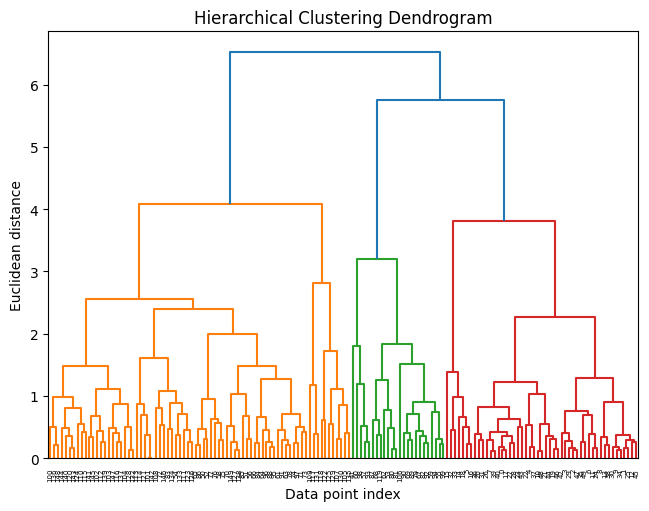

In [17]:
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point index')
plt.ylabel('Euclidean distance')
plt.show()

In [18]:
labels_scipy = fcluster(row_clusters, t=3, criterion='maxclust')

# Compare with true species labels
pd.crosstab(labels_scipy, y, rownames=['Cluster'], colnames=['True Label'])

True Label,0,1,2
Cluster,,,
1,0,29,48
2,1,21,2
3,49,0,0


## Con scikit-learn

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Build the model
model = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',   # distance metric
    linkage='complete'      # same criterion as in SciPy
)

# Fit and get cluster labels
labels_sklearn = model.fit_predict(X_scaled)

# Compare results
pd.crosstab(labels_sklearn, y, rownames=['Cluster'], colnames=['True Label'])

True Label,0,1,2
Cluster,,,
0,0,29,48
1,49,0,0
2,1,21,2


Vemos que ambas implementaciones nos dan los mismos clústers.

## Ventajas y limitaciones
### Ventajas
- Permite comprender relaciones, jerarquía y estructura.
- Visualización mediante dendrograma.
- No requiere especificar el número de clústers. Puedes elegir el número de clústers en base al dendrograma.
- Determinista
- Pueden usarse distintas métricas: euclidea, Manhattan, cosine, correlation, etc.
### Limitaciones
- Escalabilidad: el clustering jerárquico aglomerativo calcula todas las distancias entre pares de puntos, lo cual es costoso para datasets grandes.
- Sensible a outliers debido a que se basa en una distancia.
- La elección del linkage afecta significativamente los resultados. No hay uno universalmente mejor que los demás, depende del problema.
- La elección de la métrica afecta a los resultados.
- Hay que "cortar" el dendrograma para obtener clústers, lo que requiere una elección subjetiva del umbral en el que hacer el corte.
### Cuándo usar hierarchical clustering
- Para datasets pequeños - medianos.
- Cuando el objetivo es explorar la estructura de los datos y las relaciones más que simplemente asignar los puntos a clústers.